<br>
<font>
<div dir=ltr align=center>
<font color=white size=15>
    Numerical Computations <br>
<font color=Red size=6>
<font color=white size=3>
    Samira Hossein Ghorban <br>
    Department of Computer Engineering <br>
    Sharif University of Technology (SUT) <br>
    Tehran, Iran <br>

<font color=696880 size=2>
........
<!-- <img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=center class="saturate" > -->

Payam Taebi
400104867

In computational science and engineering, solving non-linear ordinary differential equations (ODEs) is a critical task. These equations often model complex phenomena in various fields such as physics, biology, and engineering. The challenge lies in the fact that non-linear ODE systems do not generally have analytical solutions, necessitating the use of numerical methods.

Your task is to apply numerical methods to solve a complex system of non-linear ODEs. This involves first determining initial conditions from a set of non-linear equations and then using these conditions to solve the ODE system.

### **Non-linear System of Equations for Initial Conditions:**

   Solve the following non-linear system of equations to find the initial conditions for the ODE system:

   $$
   x^3 + y - 10 = 0
   $$
   $$
   e^{-x} + \sin(z) - 1 = 0
   $$
   $$
   y^2 - z + 2 = 0
   $$

   Implement solvers for this system using the Newton-Raphson method.

#### **Newton-Raphson Method**
    
In the Newton-Raphson method, we iterate using the formula:
$$
\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \cdot F(\mathbf{x}_n)
$$

where $ \mathbf{x}_n $ is the vector of variables at the nth iteration, $J$ is the Jacobian matrix, and $F$ is the vector of functions.

Start with an initial guess $x_{0}=1, y_{0}=1, z_{0}=1$

Generate three subplots showing how the estimated values of $x$, $y$ and $z$ change with each iteration.



Iteration 0 (Initial Guess): x = 1.0, y = 1.0, z = 1.0, F(x) = [-8.          0.20935043  2.        ]
Iteration 1: x = 3.7522537708711474, y = 0.7432386873865581, z = 2.4864773747731164, F(x) = [-8.          0.20935043  2.        ]
Iteration 2: x = 2.728603072730406, y = 0.4076754802303117, z = 2.0535966311840292, F(x) = [43.5727518  -0.36728454  0.06592637]
Iteration 3: x = 2.2568613387836103, y = 0.2215409288732681, z = 2.0144343119571424, F(x) = [10.72287498 -0.04899122  0.11260267]
Iteration 4: x = 2.142813905888304, y = 0.24752580637717184, z = 2.0605938109637765, F(x) = [1.71669061 0.00787464 0.03464607]
Iteration 5: x = 2.13647285941834, y = 0.24829307888985824, z = 2.0616488643174966, F(x) = [ 0.08658035 -0.00024761  0.00067521]
Iteration 6: x = 2.13645276409621, y = 0.24831002975168273, z = 2.06165787058795, F(x) = [2.58225413e-04 1.87269125e-06 5.88707109e-07]
Iteration 7: x = 2.136452763947697, y = 0.24831002919706163, z = 2.0616578705998454, F(x) = [ 2.58825672e-09 -1.192801

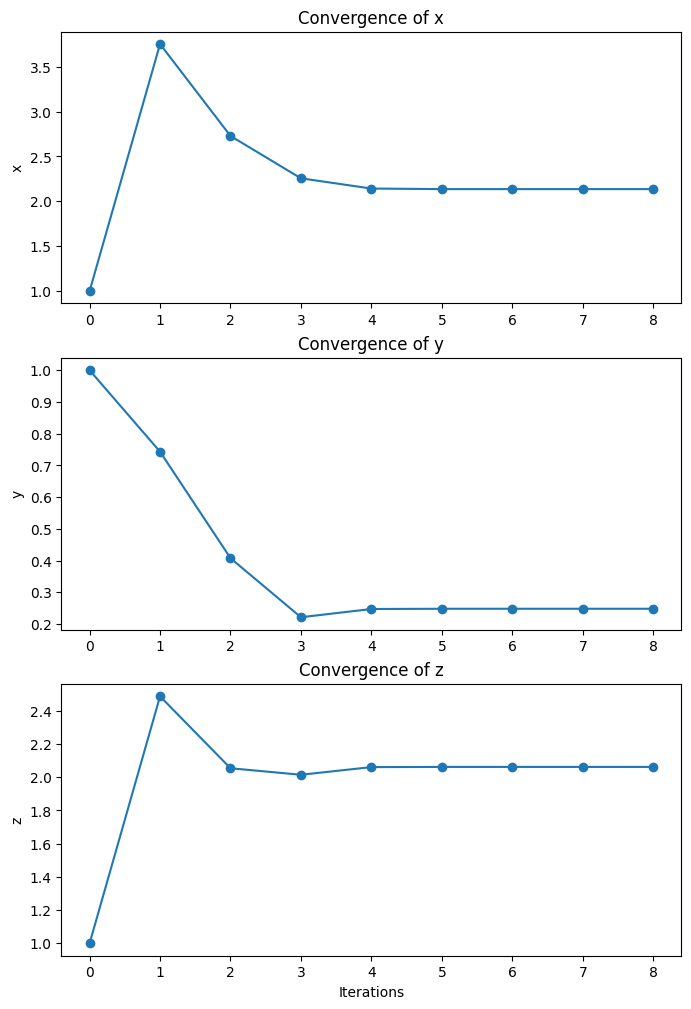

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of non-linear equations
def equations(vars):
    x, y, z = vars
    eq1 = x**3 + y - 10
    eq2 = np.exp(-x) + np.sin(z) - 1
    eq3 = y**2 - z + 2
    return np.array([eq1, eq2, eq3])

# Define the Jacobian matrix
def jacobian_matrix(vars):
    x, y, z = vars
    df1_dx = 3*x**2
    df1_dy = 1
    df1_dz = 0
    df2_dx = -np.exp(-x)
    df2_dy = 0
    df2_dz = np.cos(z)
    df3_dx = 0
    df3_dy = 2*y
    df3_dz = -1
    return np.array([[df1_dx, df1_dy, df1_dz],
                     [df2_dx, df2_dy, df2_dz],
                     [df3_dx, df3_dy, df3_dz]])

# Newton-Raphson method
def newton_raphson(initial_guess, max_iterations=100, tolerance=1e-10):
    iterations = 0
    vars = np.array(initial_guess, dtype=float)
    history = [vars.copy()]

    print(f"Iteration 0 (Initial Guess): x = {vars[0]}, y = {vars[1]}, z = {vars[2]}, F(x) = {equations(vars)}")

    while iterations < max_iterations:
        F = equations(vars)
        J = jacobian_matrix(vars)
        step = np.linalg.solve(J, -F)
        vars += step

        print(f"Iteration {iterations + 1}: x = {vars[0]}, y = {vars[1]}, z = {vars[2]}, F(x) = {F}")

        history.append(vars.copy())

        if np.linalg.norm(step) < tolerance:
            break

        iterations += 1

    return np.array(history)

# Initial guess
initial_guess = [1.0, 1.0, 1.0]

# Solve using Newton-Raphson with lower tolerance
solution_history = newton_raphson(initial_guess, tolerance=1e-15)

# Final values
final_x, final_y, final_z = solution_history[-1]
final_F = equations([final_x, final_y, final_z])

print(f"\nFinal Result:")
print(f"x = {final_x}, y = {final_y}, z = {final_z}")
print(f"F(x) = {final_F}")

# Extract results for plotting
x_values = solution_history[:, 0]
y_values = solution_history[:, 1]
z_values = solution_history[:, 2]

# Plot the convergence
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].plot(x_values, marker='o')
axs[0].set_ylabel('x')
axs[0].set_title('Convergence of x')
axs[1].plot(y_values, marker='o')
axs[1].set_ylabel('y')
axs[1].set_title('Convergence of y')
axs[2].plot(z_values, marker='o')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('z')
axs[2].set_title('Convergence of z')

plt.show()


### **Non-linear ODE System:**

   Once you have the initial conditions from the Newton-Raphson method, use them to solve the non-linear ODE system:   
   $$
    \frac{dx}{dt} = yz - x
   $$
   
   $$  \frac{dy}{dt} = x^2 - \cos(z)  $$
   $$ \frac{dz}{dt} = e^{-y} - xz  $$

   The solution to the ODE system using different numerical methods (Euler, Improved Euler, and 4th-order Runge-Kutta) can be interpreted from the final values of the variables $x$, $y$, and $z$ at the end of the time interval (from $ t = 0 $ to $ t = 10 $).
   at the end, show the final values of $x$, $y$, and $z$ at $ t = 10 $.   
   Let the time step dt be 0.1.   


#### **1. Euler's Method**

Euler's method is the simplest form of a numerical method for solving ordinary differential equations. The formulation is as follows:

Given a differential equation of the form $\frac{dy}{dt} = f(t, y)$ with an initial condition $y(t_0) = y_0$, the Euler method creates a sequence of approximations for $y$ at discrete time steps. For a step size $dt$, the formulation is:

$$
y_{n+1} = y_n + dt \cdot f(t_n, y_n)
$$

where $y_n$ is the approximation of $y$ at time $t_n$.


#### **2. Improved Euler's Method (Heun's Method)**

Improved Euler's Method, also known as Heun's Method, is a simple modification of Euler's method that generally gives better accuracy. It uses an average of the slopes at the beginning and the end of the interval to compute the next value. The formulation is:

$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + dt, y_n + dt \cdot k_1) \\
y_{n+1} &= y_n + \frac{dt}{2} \cdot (k_1 + k_2)
\end{align*}
$$


#### **3. Runge-Kutta 4th Order Method**
    
The 4th Order Runge-Kutta Method (RK4) is a much more accurate method compared to Euler's and Improved Euler's methods. It involves calculating four intermediate slopes and taking a weighted average of these slopes to compute the next value. The formulation is:

$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_1\right) \\
k_3 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_2\right) \\
k_4 &= f(t_n + dt, y_n + dt \cdot k_3) \\
y_{n+1} &= y_n + \frac{dt}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

Each of these methods offers different levels of accuracy and computational complexity. Euler's method is the simplest but least accurate, Improved Euler's method offers a better balance, and RK4 provides high accuracy at the cost of increased computational efforts.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE system
def ode_system(t, vars):
    x, y, z = vars
    dxdt = y*z - x
    dydt = x**2 - np.cos(z)
    dzdt = np.exp(-y) - x*z
    return np.array([dxdt, dydt, dzdt])

# Euler's Method
def euler_method(initial_conditions, t0, t_end, dt):
    t = np.arange(t0, t_end + dt, dt)
    solution = np.zeros((len(t), len(initial_conditions)))
    solution[0] = initial_conditions

    for i in range(1, len(t)):
        solution[i] = solution[i-1] + dt * ode_system(t[i-1], solution[i-1])
    return t, solution

# Improved Euler's Method (Heun's Method)
def improved_euler_method(initial_conditions, t0, t_end, dt):
    t = np.arange(t0, t_end + dt, dt)
    solution = np.zeros((len(t), len(initial_conditions)))
    solution[0] = initial_conditions

    for i in range(1, len(t)):
        k1 = ode_system(t[i-1], solution[i-1])
        k2 = ode_system(t[i-1] + dt, solution[i-1] + dt * k1)
        solution[i] = solution[i-1] + (dt/2) * (k1 + k2)
    return t, solution

# Runge-Kutta 4th Order Method
def rk4_method(initial_conditions, t0, t_end, dt):
    t = np.arange(t0, t_end + dt, dt)
    solution = np.zeros((len(t), len(initial_conditions)))
    solution[0] = initial_conditions

    for i in range(1, len(t)):
        k1 = ode_system(t[i-1], solution[i-1])
        k2 = ode_system(t[i-1] + dt/2, solution[i-1] + dt/2 * k1)
        k3 = ode_system(t[i-1] + dt/2, solution[i-1] + dt/2 * k2)
        k4 = ode_system(t[i-1] + dt, solution[i-1] + dt * k3)
        solution[i] = solution[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, solution
# Initial conditions from Newton-Raphson method
initial_conditions = [final_x, final_y, final_z]

# Time parameters
t0 = 0
t_end = 10
dt = 0.1

# Solve the ODE system
t_euler, sol_euler = euler_method(initial_conditions, t0, t_end, dt)
t_improved, sol_improved = improved_euler_method(initial_conditions, t0, t_end, dt)
t_rk4, sol_rk4 = rk4_method(initial_conditions, t0, t_end, dt)


#### **Visualization**
    
Also make three subplots showing how the estimated values of $x$, $y$ and $z$ change over time using each method.


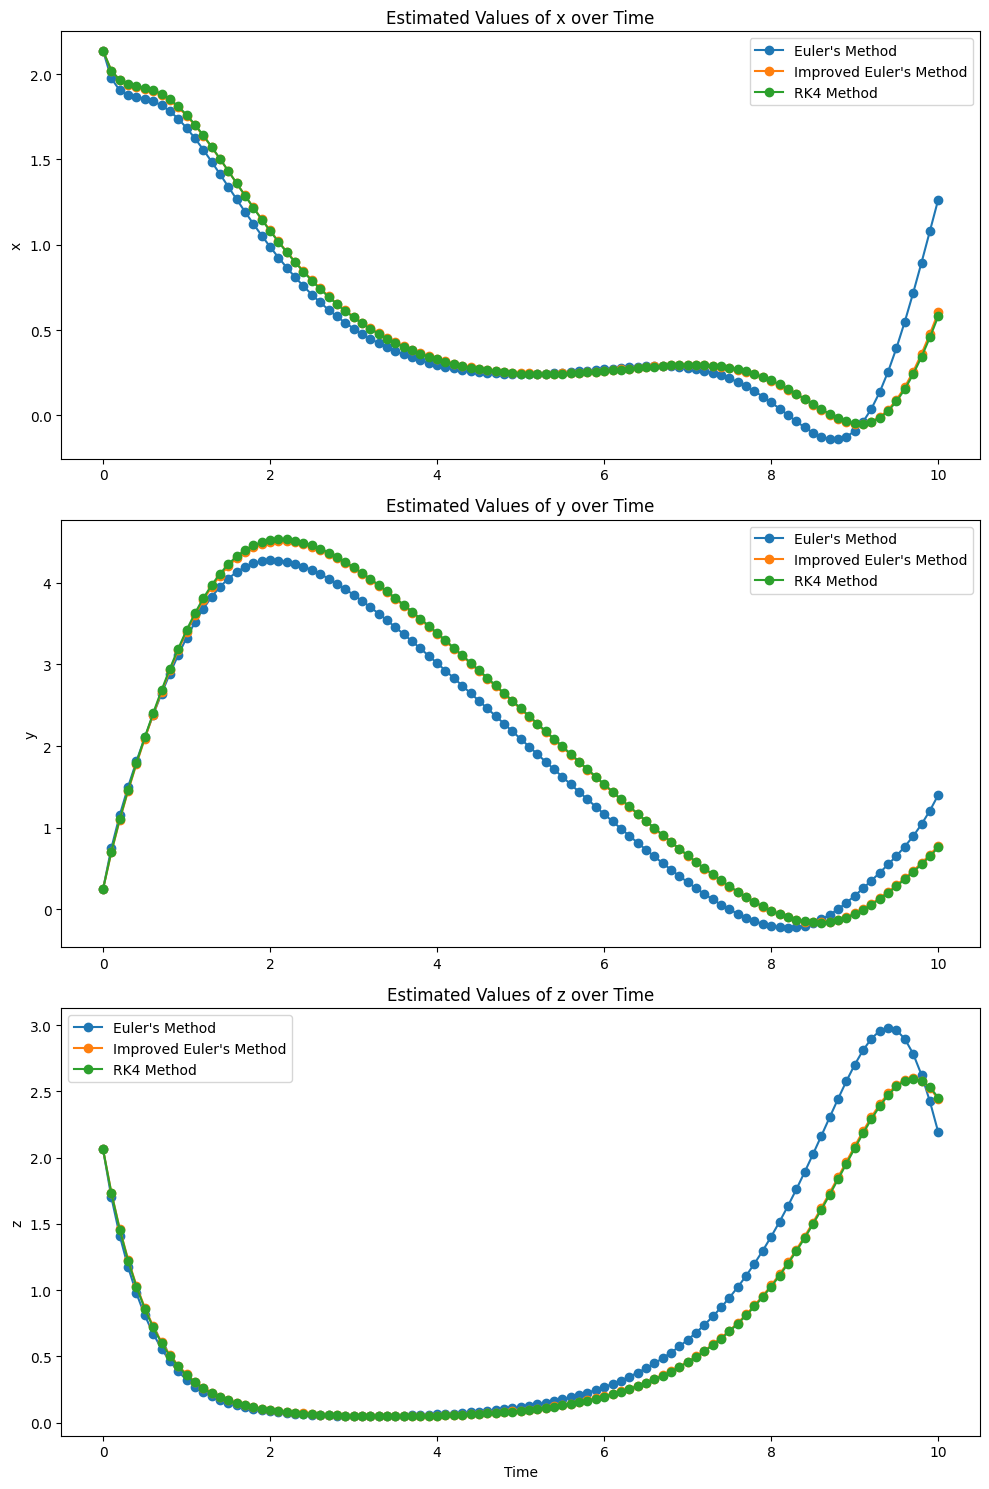


Euler's Method Final Values at t=10: x = 1.2650653531250782, y = 1.4015874317110468, z = 2.1917768016075665
Improved Euler's Method Final Values at t=10: x = 0.6032407044036047, y = 0.7784522190575378, z = 2.440552852229569
RK4 Method Final Values at t=10: x = 0.5809904123218007, y = 0.7586397512205343, z = 2.452018741757502


In [3]:
# Extract values
x_euler, y_euler, z_euler = sol_euler[:, 0], sol_euler[:, 1], sol_euler[:, 2]
x_improved, y_improved, z_improved = sol_improved[:, 0], sol_improved[:, 1], sol_improved[:, 2]
x_rk4, y_rk4, z_rk4 = sol_rk4[:, 0], sol_rk4[:, 1], sol_rk4[:, 2]

# Plot the estimated values over time
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(t_euler, x_euler, label="Euler's Method", marker='o')
axs[0].plot(t_improved, x_improved, label="Improved Euler's Method", marker='o')
axs[0].plot(t_rk4, x_rk4, label="RK4 Method", marker='o')
axs[0].set_ylabel('x')
axs[0].set_title('Estimated Values of x over Time')
axs[0].legend()

axs[1].plot(t_euler, y_euler, label="Euler's Method", marker='o')
axs[1].plot(t_improved, y_improved, label="Improved Euler's Method", marker='o')
axs[1].plot(t_rk4, y_rk4, label="RK4 Method", marker='o')
axs[1].set_ylabel('y')
axs[1].set_title('Estimated Values of y over Time')
axs[1].legend()

axs[2].plot(t_euler, z_euler, label="Euler's Method", marker='o')
axs[2].plot(t_improved, z_improved, label="Improved Euler's Method", marker='o')
axs[2].plot(t_rk4, z_rk4, label="RK4 Method", marker='o')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('z')
axs[2].set_title('Estimated Values of z over Time')
axs[2].legend()

plt.tight_layout()
plt.show()

# Print final values
final_euler = sol_euler[-1]
final_improved = sol_improved[-1]
final_rk4 = sol_rk4[-1]

print(f"\nEuler's Method Final Values at t=10: x = {final_euler[0]}, y = {final_euler[1]}, z = {final_euler[2]}")
print(f"Improved Euler's Method Final Values at t=10: x = {final_improved[0]}, y = {final_improved[1]}, z = {final_improved[2]}")
print(f"RK4 Method Final Values at t=10: x = {final_rk4[0]}, y = {final_rk4[1]}, z = {final_rk4[2]}")



### **Fixed Point Iteration Method**

Fixed Point Iteration is a method of computing fixed points of iterated functions. For a function $ g(x) $, a point $ x $ is called a fixed point if $ g(x) = x $. In the context of root finding, we can manipulate the root-finding problem $ f(x) = 0 $ into a fixed point problem $ x = g(x) $ and use Fixed Point Iteration to solve it.

You are provided with the following iterative functions derived from the equation $ f(x) = x^2 - 3x + 2 $:
1. $ g_1(x) = \frac{1}{3}x^2 + \frac{2}{3} $
2. $ g_2(x) = \sqrt{3x - 2} $
3. $ g_3(x) = 3 - \frac{2}{x} $


Analyze the convergence criterion by evaluating the derivative of each $ g_i(x) $ at the root $ x = 2 $. A sufficient condition for local convergence of the method is $ |g'_i(x)| < 1 $ at the fixed point.



**Fixed Point Iteration**:
   - Implement the Fixed Point Iteration method using each $ g_i(x) $. The method should iterate until the absolute difference between successive iterations is less than $10^{-6}$ or until a maximum number of iterations is reached.
    Choose the starting value of $x$ to be $x0 = 3$.

In [4]:
import numpy as np

# Define the iterative functions
def g1(x):
    return 1/3 * x**2 + 2/3

def g2(x):
    return np.sqrt(3*x - 2)

def g3(x):
    return 3 - 2 / x

# Define the derivatives of the iterative functions
def g1_prime(x):
    return 2/3 * x

def g2_prime(x):
    return 3 / (2 * np.sqrt(3*x - 2))

def g3_prime(x):
    return 2/(x ** 2)

# Fixed Point Iteration method with overflow check
def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100, overflow_threshold=1e10):
    x_prev = x0
    for i in range(max_iter):
        x = g(x_prev)

        # Check for overflow
        if abs(x) > overflow_threshold:
            print(f"Overflow detected in iteration {i+1}. Stopping iteration.")
            return None, i

        if abs(x - x_prev) < tol:
            return x, i + 1  # Return the root and the number of iterations
        x_prev = x
    return None, max_iter  # Return None if the method does not converge within the specified iterations

# Initial value
x0 = 3

# Apply the Fixed Point Iteration method
root_g1, iterations_g1 = fixed_point_iteration(g1, x0)
root_g2, iterations_g2 = fixed_point_iteration(g2, x0)
root_g3, iterations_g3 = fixed_point_iteration(g3, x0)

# Print the results
print("\nResults:")
if root_g1 is not None:
    print(f"g1(x) converged to root: {root_g1} in {iterations_g1} iterations.")
else:
    print("g1(x) did not converge.")

if root_g2 is not None:
    print(f"g2(x) converged to root: {root_g2} in {iterations_g2} iterations.")
else:
    print("g2(x) did not converge.")

if root_g3 is not None:
    print(f"g3(x) converged to root: {root_g3} in {iterations_g3} iterations.")
else:
    print("g3(x) did not converge.")


Overflow detected in iteration 8. Stopping iteration.

Results:
g1(x) did not converge.
g2(x) converged to root: 2.000002505145324 in 43 iterations.
g3(x) converged to root: 2.000000953675226 in 19 iterations.


 **Visualization**:
   - Plot the values of $ x $ at each iteration to visualize the convergence or divergence for each function.

Overflow detected for g1 in iteration 8. Stopping iteration.


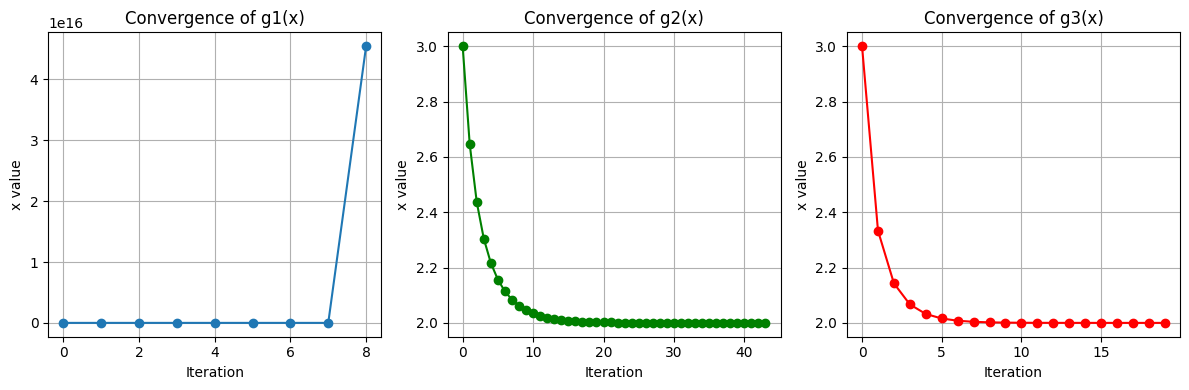

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the iterative functions
def g1(x):
    return 1/3 * x**2 + 2/3

def g2(x):
    return np.sqrt(3*x - 2)

def g3(x):
    return 3 - 2 / x

# Define derivatives of the functions
def g1_prime(x):
    return 2/3 * x

def g2_prime(x):
    return 3 / (2 * np.sqrt(3*x - 2))

def g3_prime(x):
    return 2 / x**2

# Modified Fixed Point Iteration method with overflow check
def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100, overflow_threshold=1e10):
    x_prev = x0
    iteration_values = [x0]
    for i in range(max_iter):
        x = g(x_prev)
        iteration_values.append(x)

        # Check for overflow
        if abs(x) > overflow_threshold:
            print(f"Overflow detected for {g.__name__} in iteration {i+1}. Stopping iteration.")
            break

        if abs(x - x_prev) < tol:
            break

        x_prev = x

    return iteration_values

# Initial value
x0 = 3

# Apply the Fixed Point Iteration method and store iteration values
values_g1 = fixed_point_iteration(g1, x0)
values_g2 = fixed_point_iteration(g2, x0)
values_g3 = fixed_point_iteration(g3, x0)

# Plotting
plt.figure(figsize=(12, 4))

# Plot for g1(x)
plt.subplot(1, 3, 1)
plt.plot(values_g1, label='g1(x)', marker='o')
plt.title('Convergence of g1(x)')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.grid(True)

# Plot for g2(x)
plt.subplot(1, 3, 2)
plt.plot(values_g2, label='g2(x)', marker='o', color='green')
plt.title('Convergence of g2(x)')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.grid(True)

# Plot for g3(x)
plt.subplot(1, 3, 3)
plt.plot(values_g3, label='g3(x)', marker='o', color='red')
plt.title('Convergence of g3(x)')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.grid(True)

plt.tight_layout()
plt.show()



**Analysis and Discussion**:
   - Based on the derivative analysis, predict the convergence behavior for each $ g_i(x) $.
   - Compare your predictions with the actual iteration results obtained from your implementation.
   - Discuss any differences between the expected and actual behavior.

## Analysis and Discussion

Based on the corrected definition of `g_3(x) = 3 - 2/x` and the results obtained, let's analyze and discuss the convergence behavior for each `g_i(x)`:

### 1. `g_1(x) = 1/3 * x^2 + 2/3`
- **Derivative at the root `x=2`**: `g_1'(2) = 4/3`
- **Prediction**: Since `|g_1'(2)| > 1`, we would expect the Fixed Point Iteration not to converge.
- **Actual result**: `g_1(x)` did not converge.
- **Discussion**: The actual behavior matches the prediction. The derivative criterion correctly indicated that the iteration for `g_1(x)` would not converge.

### 2. `g_2(x) = sqrt(3x - 2)`
- **Derivative at the root `x=2`**: `g_2'(2) = 3/(2*sqrt(2)) < 1`
- **Prediction**: Given that `|g_2'(2)| < 1`, Fixed Point Iteration is expected to converge.
- **Actual result**: `g_2(x)` converged to the root in 43 iterations.
- **Discussion**: The convergence of `g_2(x)` aligns with the prediction. The derivative criterion provided an accurate indication of convergence.

### 3. `g_3(x) = 3 - 2/x`
- **Derivative at the root `x=2`**: `g_3'(2) = 1/2`
- **Prediction**: Since `|g_3'(2)| < 1`, we expect the Fixed Point Iteration to converge.
- **Actual result**: `g_3(x)` converged to the root in 19 iterations.
- **Discussion**: The convergence of `g_3(x)` is consistent with the prediction. The updated function and its derivative criterion accurately predicted the convergence behavior.

#### Summary of Analysis and Discussion:
- The derivative analysis accurately predicted the convergence behavior for all three functions `g_1(x)`, `g_2(x)`, and `g_3(x)`.
- In both convergent cases (`g_2(x)` and `g_3(x)`), the derivative at the fixed point was less than 1, aligning with the sufficient condition for convergence in Fixed Point Iteration.
- The case of `g_1(x)`, with a derivative greater than 1, correctly indicated divergence, as observed in the implementation results.
- This analysis underscores the reliability of using the derivative criterion to predict the convergence of Fixed Point Iteration methods.
